In [1]:
# Load in all preliminary packages needed for analysis
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.plot.width = 16, repr.plot.height = 12)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Heart Disease Classification
By: Andy Hu, Sharon Tu, Dylan Zhang, Renz Tingson

## Introduction
When will we find the cure to cancer? What is the newest cutting edge medical technology? Medicine is on the forefront of innovation and advancement, with people pouring in extensive resources for research purposes and progression. In particular, heart disease is the second leading cause of death among Canadians, with roughly 1 in 12 adults recieving a diagnosis within their lifetime. Heart disease is a broad term that encompasses a variety of conditions affecting the cardiovasular system, comprised of the heart and blood vessels. The most common of these conditions include coronary heart disease, angina, heart attacks, heart failure, arrhythmias, and stroke. As such, it is crucial to be able to detect and diagnose heart disease early in order to prevent long-term deficits, or potentially even death. Our research aims to find ways in which we can accomplish this in way that is accessible to everyone.

## Research Question
What factors constitute to classifying whether or not a patient has a heart disease? We plan to classify if a patient has a heart disease (in other words, that they have >50% diameter narrowing of blood vessels) based on age and maximum heart rate achieved. Based on a patient's diagnosis on these factors, can we effectively and accurately diagnose them as having a heart disease or not?

## Dataset
We will be using the cleveland dataset for our research, which contains 14 distinct characteristics about each patient in the data. We will be focusing specifically on the columns for age and maximum heart rate achieved as our predictors, as well as the presence of heart disease (value of 1) or not (value of 0).

# 2) Methods & Results

In [2]:
# Load the dataset into R, and clean/wrangle the data into a tidy format

## Make a vector of column names to use for the dataset
vec_names <- c( "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num" )

heart_data <- read_csv("data/cleveland_heart.txt", col_names = vec_names) |>
    mutate(across(sex:cp, as_factor)) |>                                  # Turn all categorical values into factors since they are
    mutate(across(fbs:restecg, as_factor)) |>                             # defaulted as chars when loaded
    mutate(exang = as_factor(exang)) |>
    mutate(across(slope:num, as_factor)) |>
    mutate(num = replace(num, num == 2 | num == 3 | num == 4, 1))         # This column labels patients on a scale of 0 to 4, where 0 is heart disease,
                                                                          # and 1-4 describe the severity of the heart disease. We turn these severity
                                                                          # cases into a value of 1, indicating presence of heart disease.
heart_data
# write_csv(heart_data, "data/cleveland_data.csv")         # writes a tidy version of the original text file into local machine for future reference

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1


In [3]:
# Selects only the predictors we use (age and maximum heart rate achieved(thalach)), and response variable num.
# We then change these column names to be more interpretable

heart <- heart_data |>
    select(age, thalach, num)
colnames(heart) <- c("age", "max_heart_rate", "status")


In [4]:
set.seed(1500)

# Splits our entire dataset into 75% training, and 25% testing
heart_split <- initial_split(heart, prop = 0.75, strata = status)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

## Summarize the data in at least one table. Eg. Report number of observations in each class,
## means of predictor variables you plan to use,

num_obs <- heart_training |>
    group_by(status) |>
    summarize(count = n())
num_obs

means <- heart_training |>
    group_by(status) |>
    summarize(across(age:max_heart_rate, mean))
means


status,count
<fct>,<int>
0,123
1,104


status,age,max_heart_rate
<fct>,<dbl>,<dbl>
0,52.46341,157.9675
1,57.41346,139.7885


From these two tables, we can see that we discover that 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



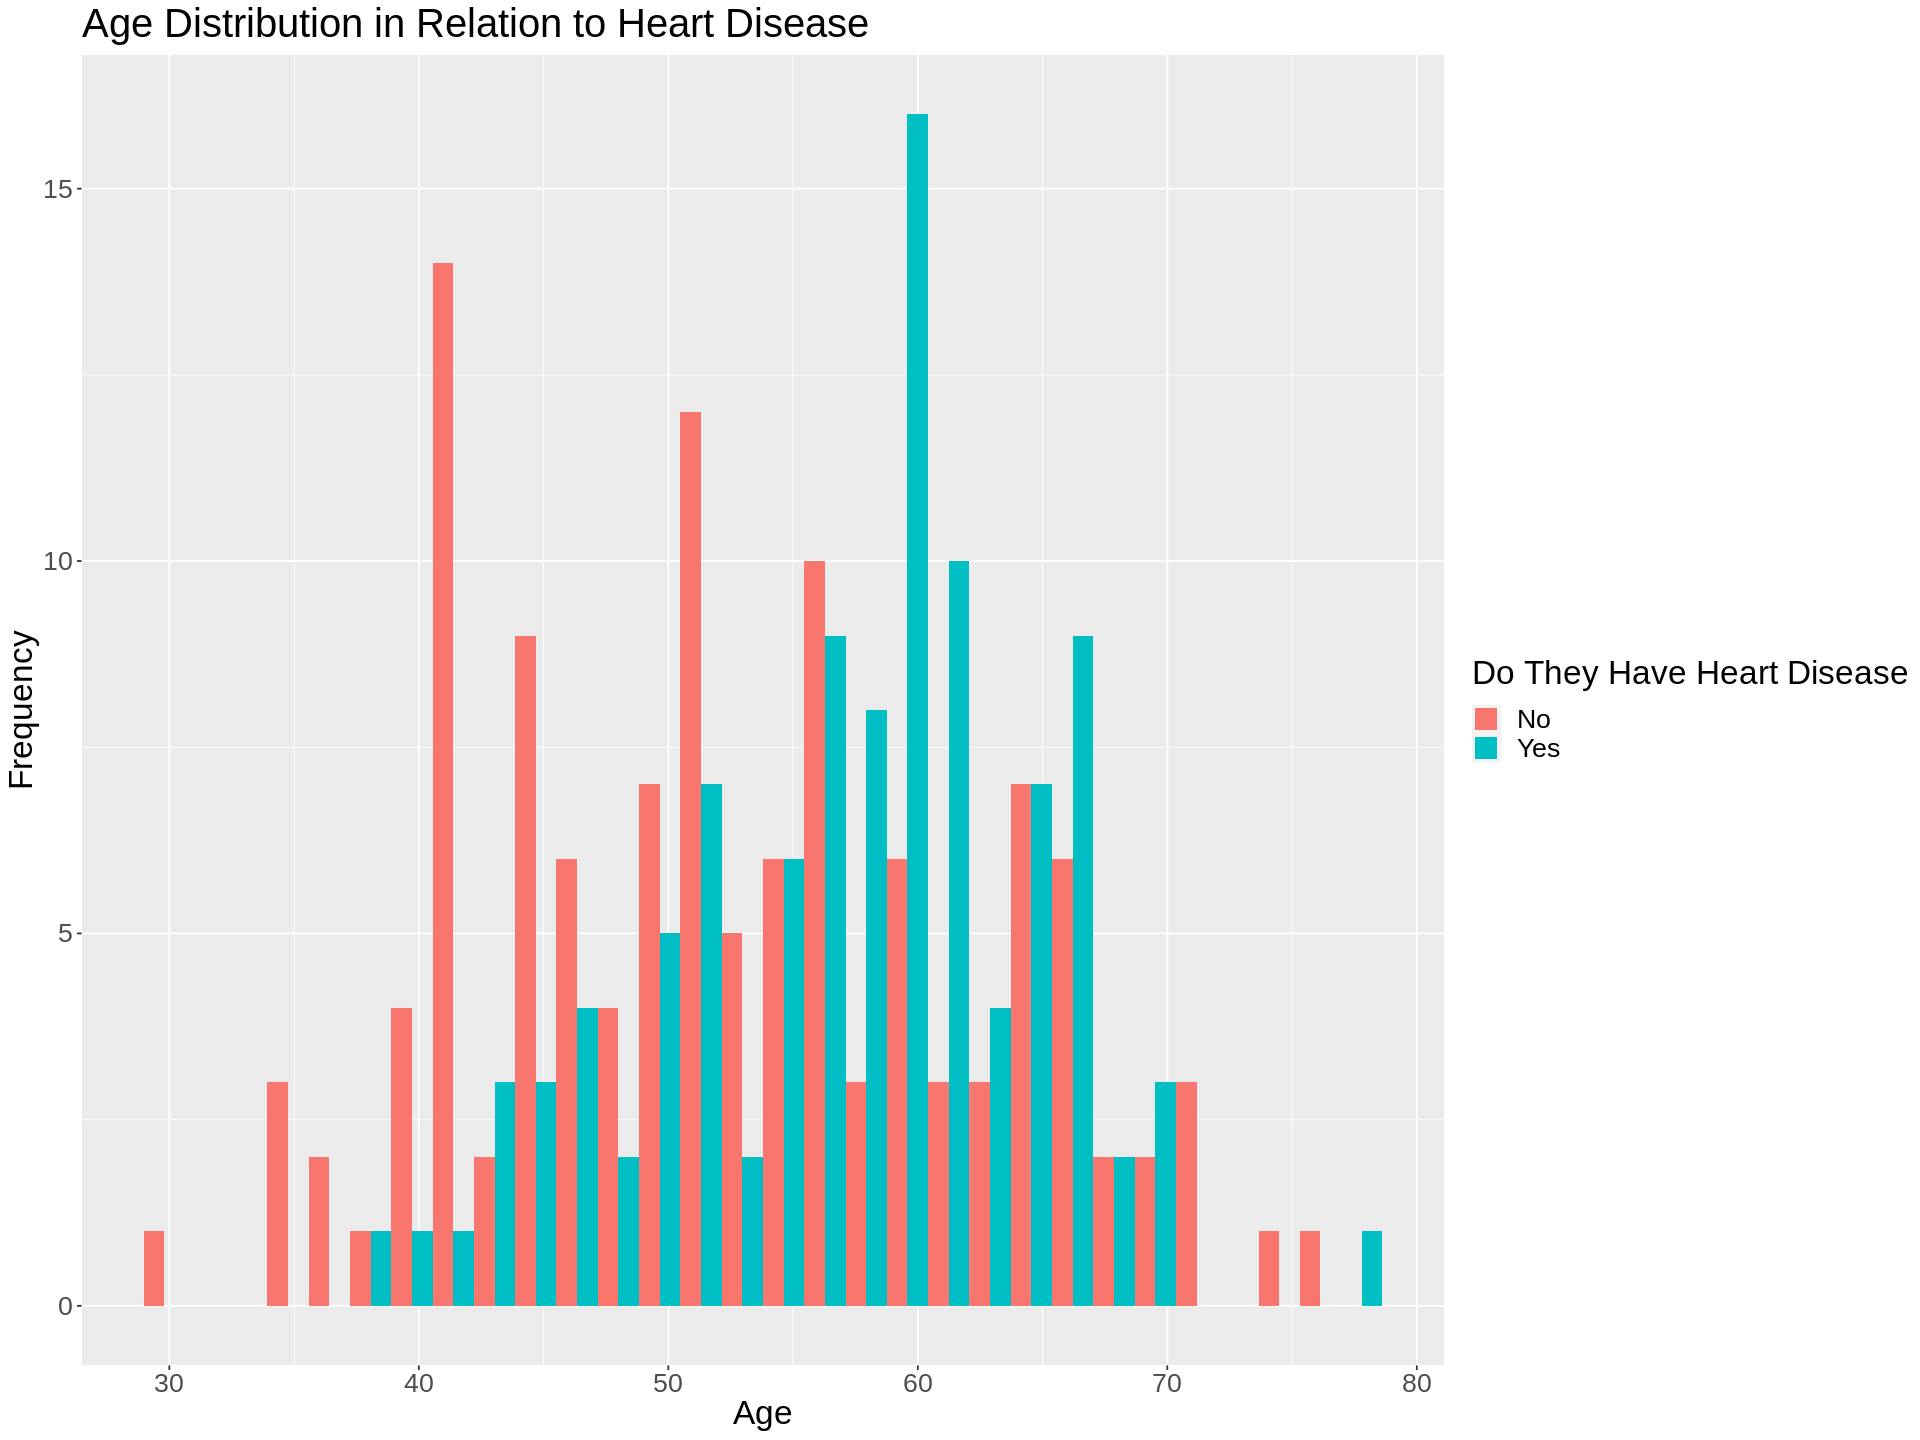

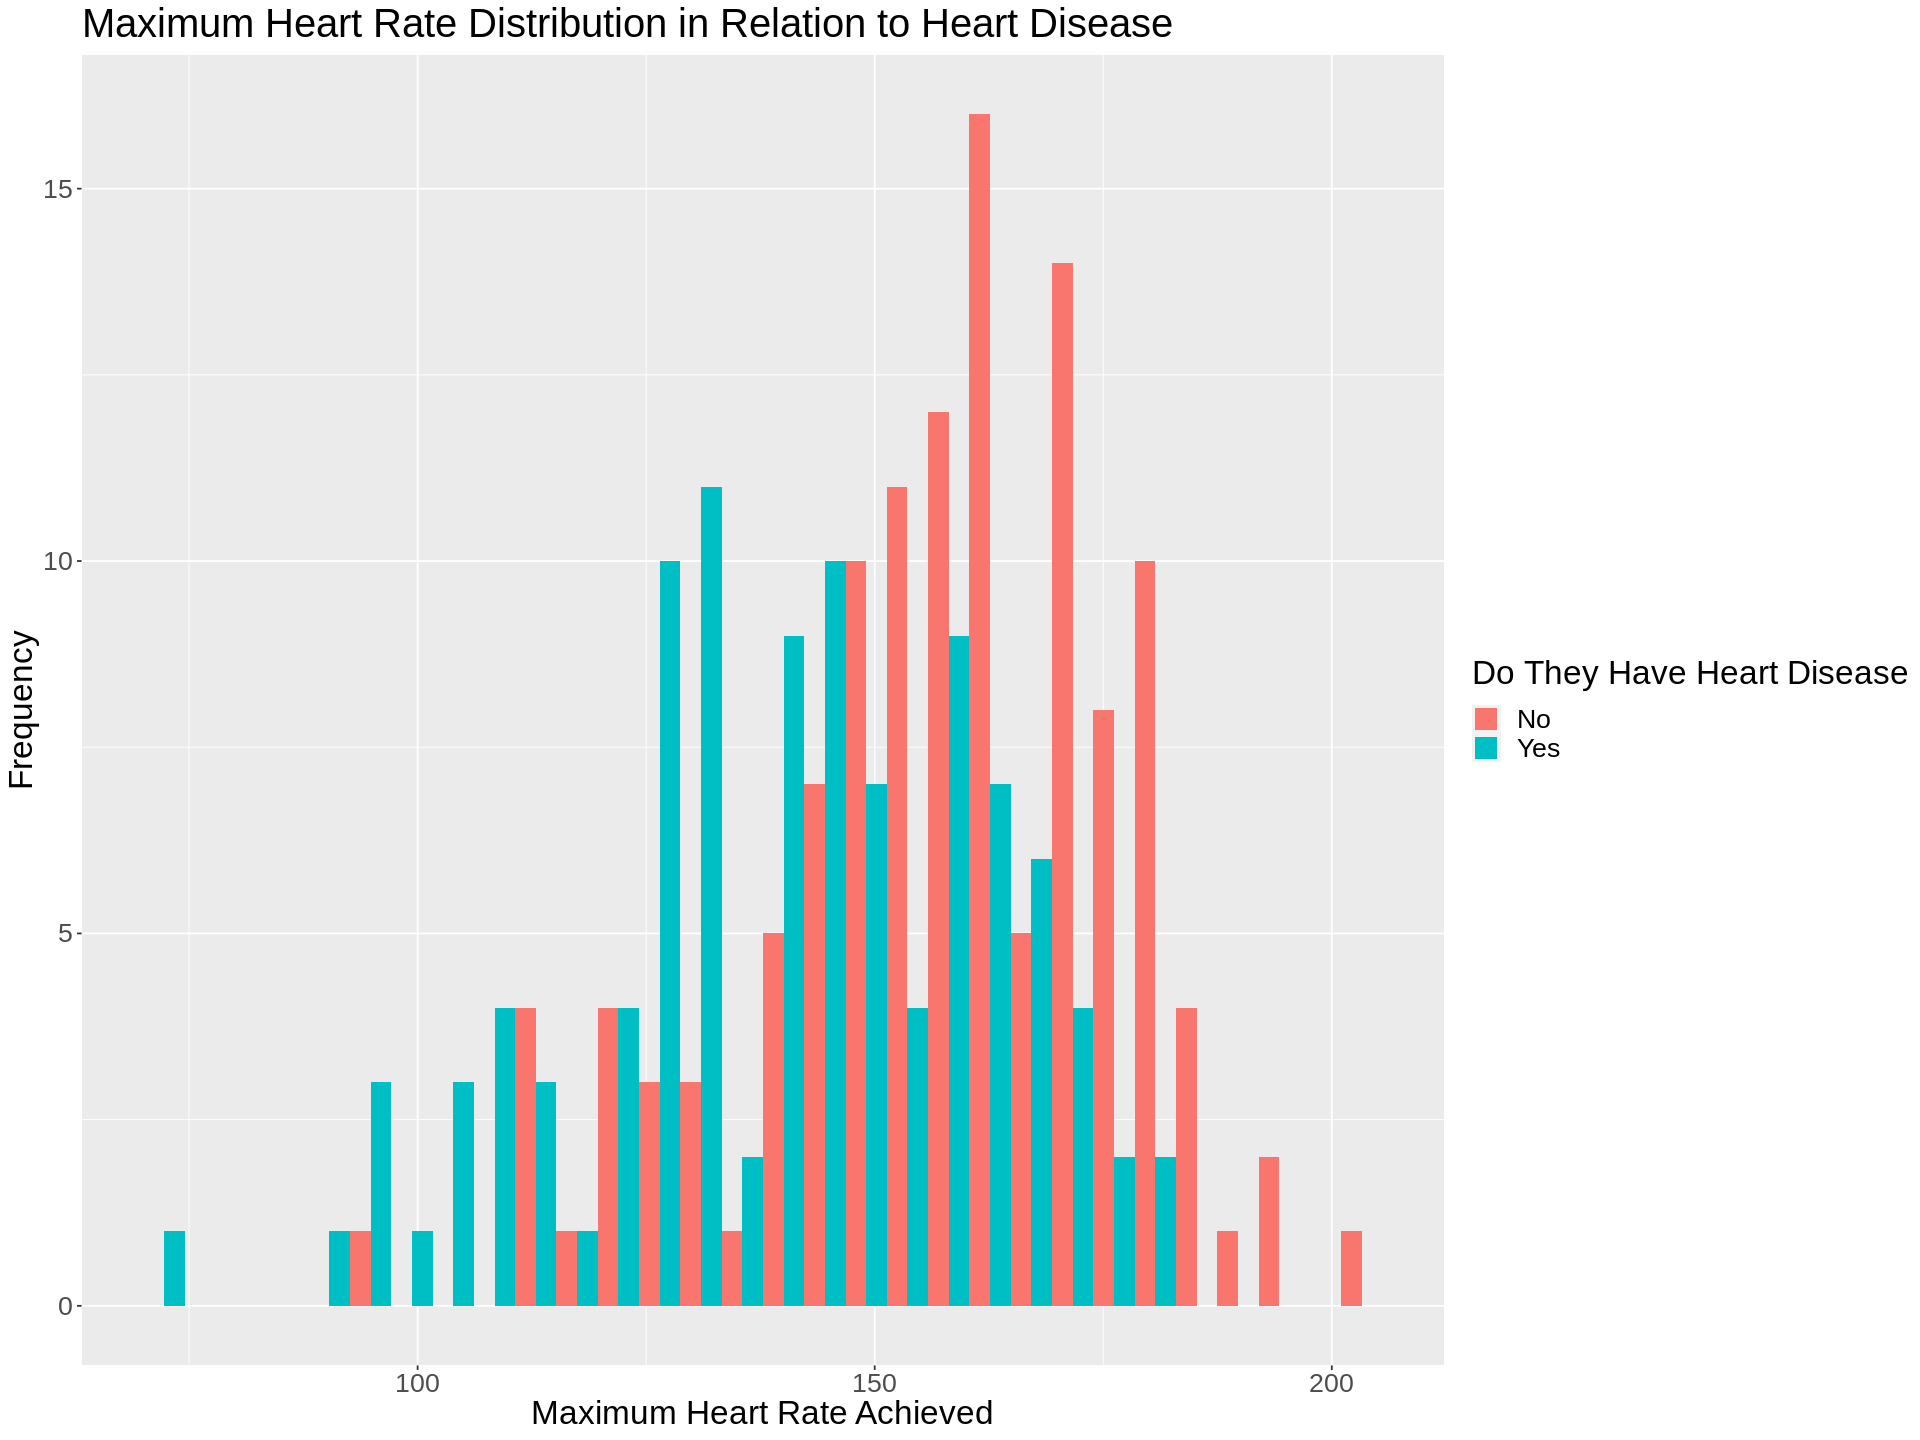

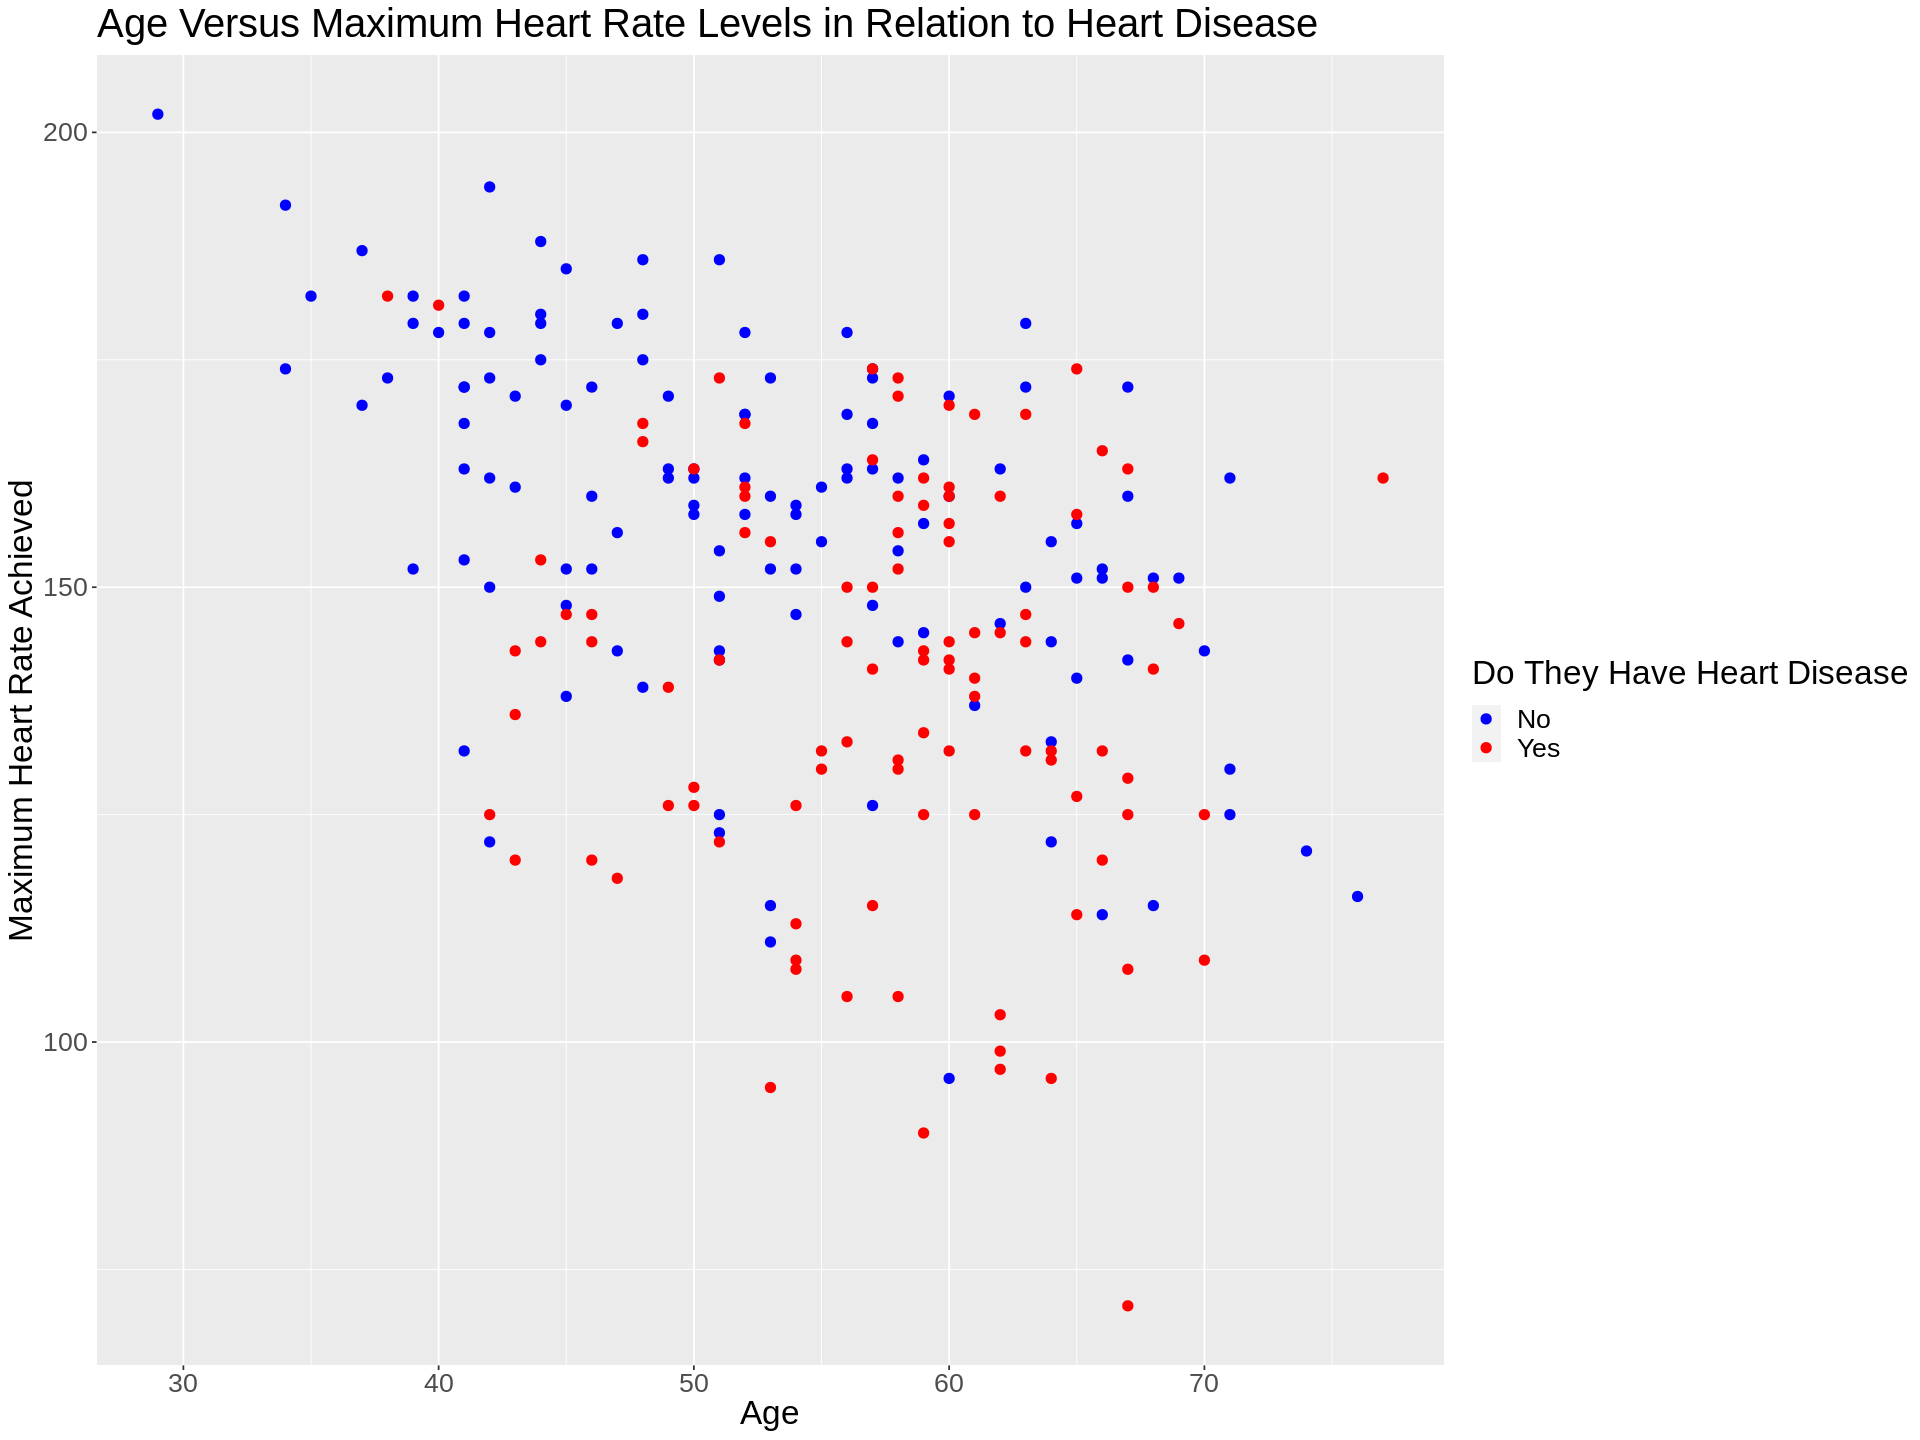

In [5]:
## Visualize the data with at least one plot relevant to the analysis you plan to do. Compare the distribution
## of each of the predictor variables you plan to use

age_hist <- heart_training |>
    ggplot(aes(x = age, fill = status)) +
    geom_histogram(size = 2.5, position = "dodge") +
    xlab("Age") +
    ylab("Frequency") +
    labs(fill = "Do They Have Heart Disease") +
    ggtitle("Age Distribution in Relation to Heart Disease") +
    scale_fill_discrete(labels = c("No", "Yes")) +
    theme(text = element_text(size = 20))
age_hist

max_heart_rate_plot <- heart_training |>
    ggplot(aes(x = max_heart_rate, fill = status)) +
    geom_histogram(size = 2.5, position = "dodge") +
    labs(x = "Maximum Heart Rate Achieved", y = "Frequency") +
    labs(fill = "Do They Have Heart Disease") +
    ggtitle("Maximum Heart Rate Distribution in Relation to Heart Disease") +
    scale_fill_discrete(labels = c("No", "Yes")) +
    theme(text = element_text(size = 20))
max_heart_rate_plot

heart_scatter <- heart_training |>
    ggplot(aes(x = age, y = max_heart_rate, color = status)) +
    geom_point(size = 2.5) +
    xlab("Age") +
    ylab("Maximum Heart Rate Achieved") +
    labs(color = "Do They Have Heart Disease") +
    ggtitle("Age Versus Maximum Heart Rate Levels in Relation to Heart Disease") +
    scale_color_manual(labels = c("No", "Yes"), 
                   values = c("blue", "red")) +
    theme(text = element_text(size = 20))
heart_scatter


In [6]:
## Recipe
set.seed(1500)

heart_recipe <- recipe(status ~ ., data = heart_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_vfold <- vfold_cv(heart_training, v = 5, strata = status) 

gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 2))

heart_results <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics()

accuracies <- heart_results |>
    filter(.metric == "accuracy")
accuracies

! Fold1: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold2: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold4: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold5: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5944181,5,0.02761267,Preprocessor1_Model01
3,accuracy,multiclass,0.5898726,5,0.02630938,Preprocessor1_Model02
5,accuracy,multiclass,0.6430215,5,0.02551036,Preprocessor1_Model03
7,accuracy,multiclass,0.6781994,5,0.01980032,Preprocessor1_Model04
9,accuracy,multiclass,0.6561616,5,0.02936276,Preprocessor1_Model05
11,accuracy,multiclass,0.6828415,5,0.02429520,Preprocessor1_Model06
13,accuracy,multiclass,0.6869917,5,0.02841099,Preprocessor1_Model07
15,accuracy,multiclass,0.6823496,5,0.03309981,Preprocessor1_Model08
17,accuracy,multiclass,0.6738516,5,0.03758608,Preprocessor1_Model09


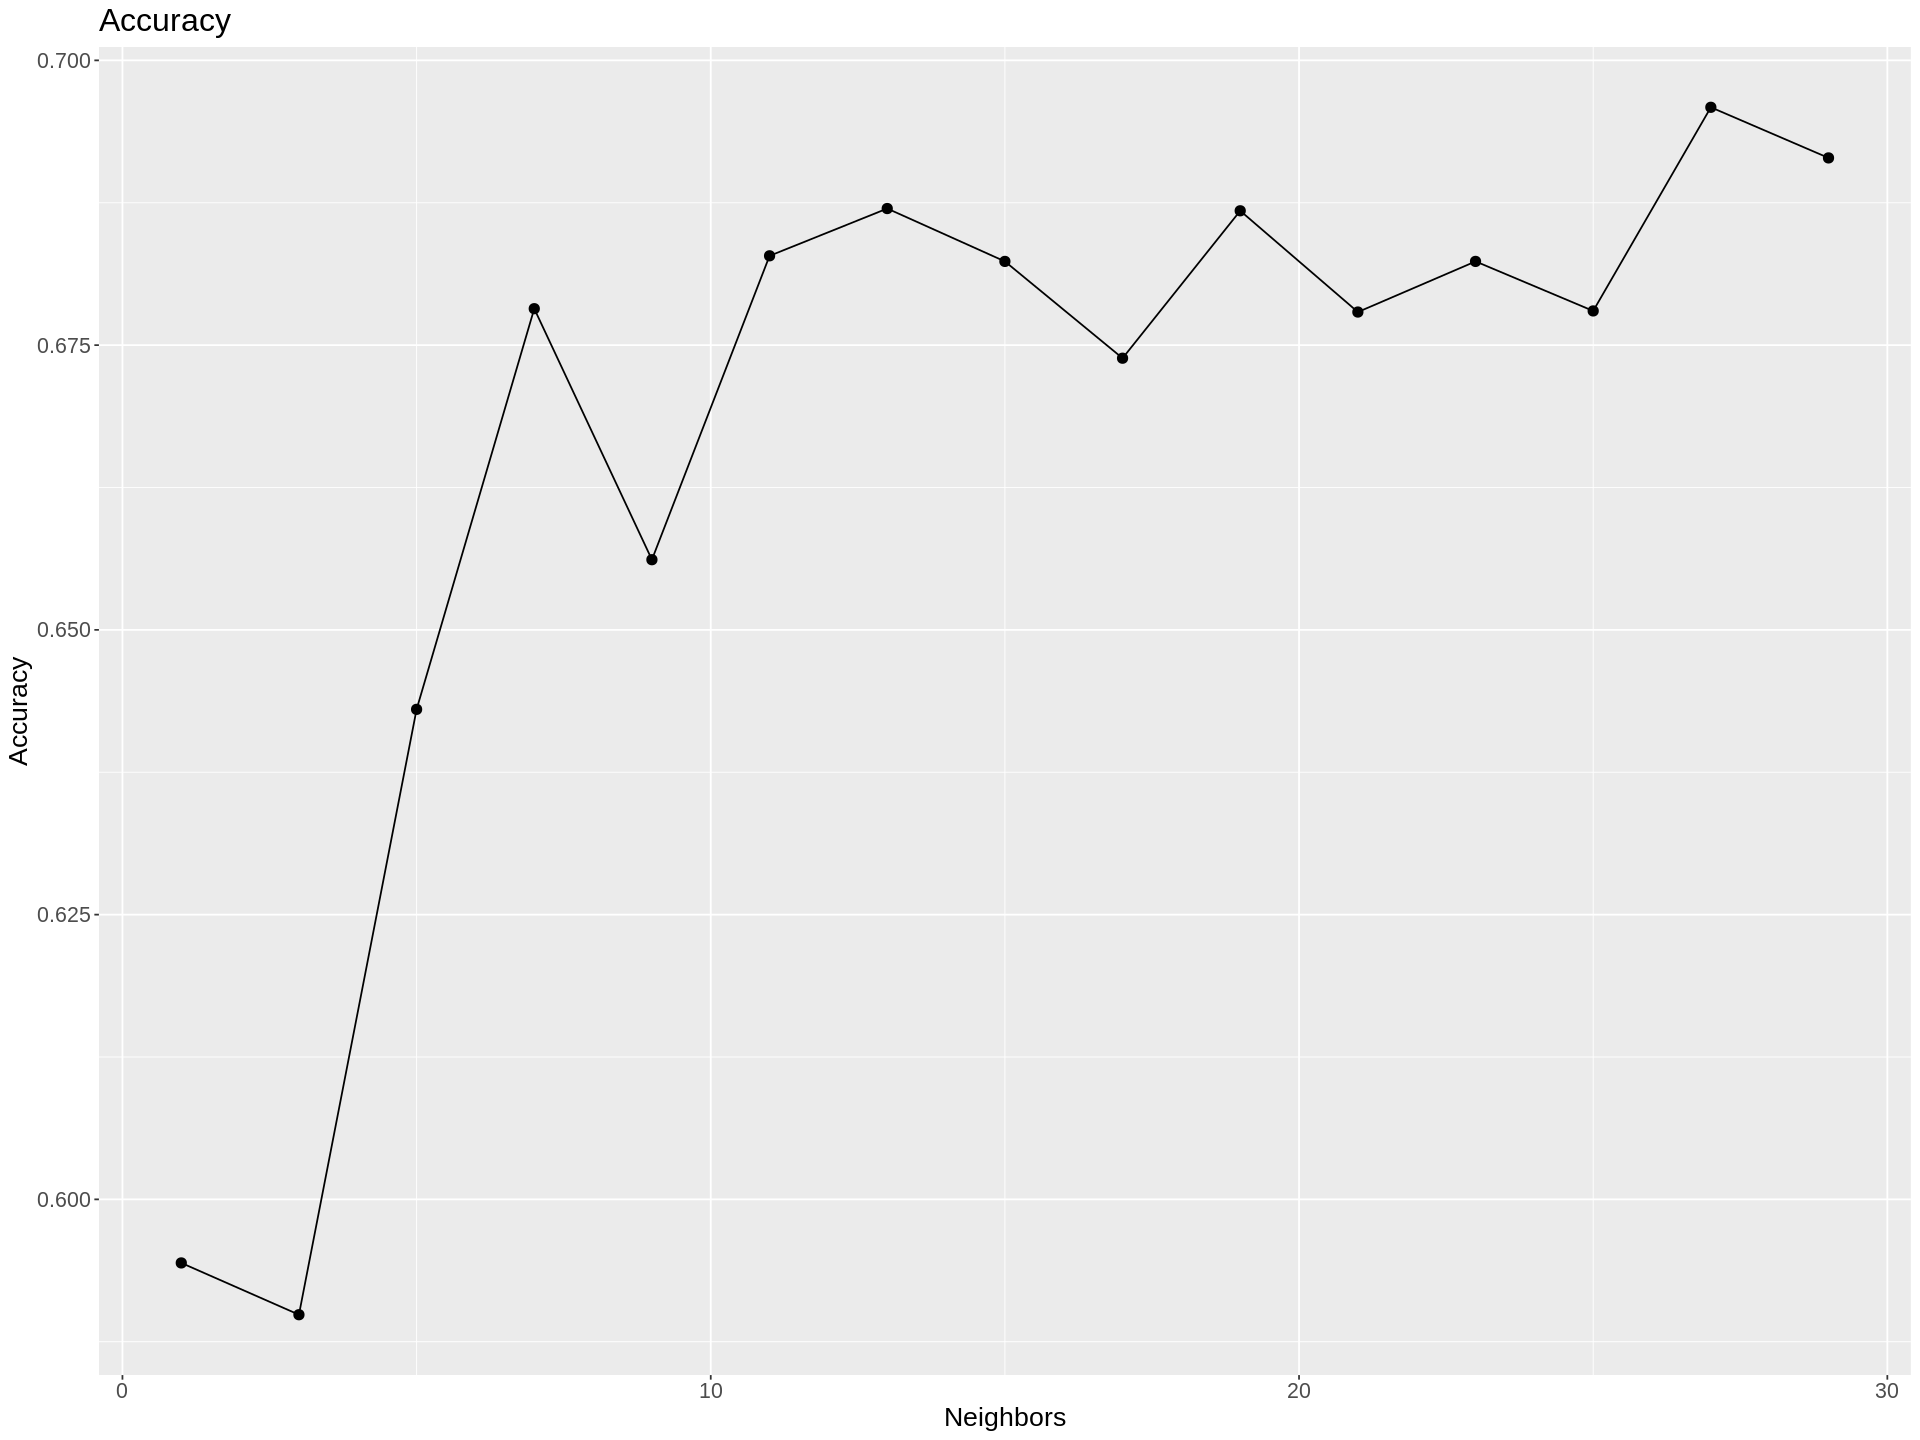

In [7]:
accuracy_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point(size = 2.5) +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy", title = "Accuracy") + 
    theme(text = element_text(size = 16))

accuracy_plot

In [8]:
## Get best k

## Choose k = 8 based on graph : explanation
heart_optimized <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_optimized) |>
    fit(heart_training) 

predictions <- predict(heart_fit, heart_testing) |>
    bind_cols(heart_testing)

results <- predictions |>
    metrics(truth = status, estimate = .pred_class) |>
    filter(.metric == "accuracy")

results

predictions |>
    conf_mat(truth = status, estimate = .pred_class)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7631579


          Truth
Prediction  0  1  2  3  4
         0 33 10  0  0  0
         1  8 25  0  0  0
         2  0  0  0  0  0
         3  0  0  0  0  0
         4  0  0  0  0  0

## Methods
To conduct our research on determining the factors that determine whether or not a patient has a heart disease, we will use the Cleveland dataset and split it into a train/test split, and further perfrom cross validation on our training data to tune for an optimal `k` value to use in a K-Nearest Neighbor algorithm for regression. We plan to use the following variables: age, resting heart rate, cholesterol levels, and maximum heart rate achieved. However, these predictors are subject to change should we discover other trends. Upon building a successful model, we will train our model once again with the tuned `k` value and compare its accuracy against the testing data, which includes the classification type of each of the patients that our model will try and predict.

## Visualization
We will visualize a graph comparing the accuracy against the number of neighbors, thus solidfying our choice of `k` in the 'k'-nearest-neighbor algorithm. Should we include more predictors, we can do a multivariable KNN classificatoin and visualize it in a 3D space. 

<!--

The best way to visualize our data would be to use a scatter plot, because we are comparing multiple continuous variables against each other, and we can colour the points by their classification of having a heart disease. Since we have so many potential predictors, visualizing this would require us to line up our visualizations side by side to show their effects. 

 ^ this is commented out btw. This is more like pre-processing stuff, not actually visualization for results with our actual model, so I think we shouldn't say this.

-->

## Expected Outcomes
We expect to find strong and quantifiable relationships between our chosen predictors and classification of whether or not a patient has a heart disease or not. We expect to see that higher measurements in our predictors will lead to a higher chance of classifying someone as having a heart disease. We expect that our model will be able to predict the classification of new patients with accuracy. 

## Significance
Such findings could have a great impact in reducing the amount of fatal heart disease problems. If someone can easily use our model to reliably predict if they are at risk of heart disease, they will have the ability go seek further medical attention from a specialist or doctor before it gets out of hand and terminal. The predictors we use are all easily monitorable factors that do not require much external equipment to measure, so it is readily accessible by everyone to self diagnose. 

## Future Questions
While finding a model to predict whether or not someone has a heart disease is great, there are still many restrictions and limitations involved with our research, which raises the awareness to further questions. For example, can our model become a mainsteram way for people to reliably test if they have a heart disease and seek more medical attention? Also, to ensure maximum accuracy of our model, we may conider adding other predictors that have a larger impact on the effects on heart disease, and potentially revise our current model to support these additions and possibly remove some less significant predictors. We also recognize the limitations of employing a KNN algorithm for classification, so other variations could be considered. 